In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob 
sns.set_style("white")

%matplotlib inline
%run functions_wiki.py


## compare events and duration 

In [7]:
def parse_title(x):
    a = x.split("/")[-1].replace(".txt","").split("_")
    title, quality = " ".join(a[:-1]), int(a[-1])
    return title, quality

def parse_duration(x):
    a = max(x) - min(x)
    return a.total_seconds()/(60*60*24)  # transfer duration into days 

def parse_page(file_name):
    default = {'submissions':'NA','duration':'NA','quality':'NA','title':'NA'}
    try:
        data = pd.read_csv(file_name, sep="\t")
        data['timestamp'] = pd.to_datetime(data['timestamp'])
        default['title'], default['quality'] = parse_title(f)
        default['submissions'] = len(data)
        default['duration'] = parse_duration(data['timestamp'])
    except:
        print("page %s parse error" %file_name)
    return default

In [8]:
file_dir = "../../data/*"
articles = glob(file_dir)
total = []
for f in articles:
    total.append(parse_page(f))
total = pd.DataFrame(total)

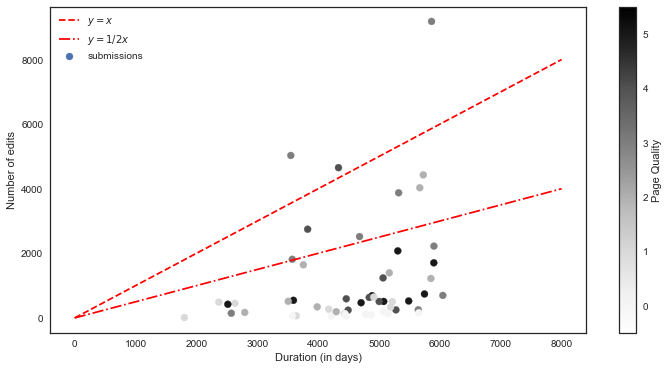

In [204]:
plt.scatter(x=total['duration'], y=total['submissions'], c=total['quality'])
plt.plot(np.arange(8000),np.arange(8000),'r--',label = '$y=x$')
plt.plot(np.arange(8000), np.arange(0,4000,0.5),'r-.',label='$y=1/2x$')
plt.xlabel('Duration (in days)')
plt.ylabel('Number of edits')
plt.colorbar(ticks=range(6), label='Page Quality')
plt.clim(-0.5,5.5)
plt.legend()
# for x,y,t in zip(total['submissions'],total['duration'],total['title']):
#     plt.annotate(s = t, xy=(x,y), xytext=(x,y))

## burst plot 

three kinds of burst plot 
- Fixed Duration;
- Fixed Events(edits);
- Life TIme;

In [142]:
def get_delta(x):
    m = min(x)
    return [(c-m).total_seconds()/(60*60*24) for c in x]

In [143]:
def plot_freq(data):
    freq = get_delta(data['timestamp'])
    plt.plot(freq, [1]*len(data), '|', markersize=1000,
             markeredgewidth=0.05, markeredgecolor='k')
    plt.ylim(0.99,1.01)
    plt.xlim(min(freq),max(freq))
    frame1 = plt.gca()
    frame1.get_xaxis().set_visible(False)
    frame1.get_yaxis().set_visible(False)
    plt.title('Total Edits')
#     plt.savefig(title+".png", dpi=300, bbox_inches='tight')

In [144]:
def get_delta2(x,mini):
    return [(c-mini).total_seconds()/(60*60*24) for c in x]

In [151]:
def plot_top_users(data, N):
    colors = ['b', 'r', 'g','c', 'm', 'y', 'k']
    top_users = data['user'].value_counts()[:N].index
#     print("top users are ", ", ".join(top_users))

    # generate user edit time freq
    mi = min(data['timestamp'])
    ma = max(data['timestamp'])
    freq_users = {}
    for user in top_users:
        mask = data['user'] == user
        tmp = data[mask]['timestamp']
        freq_users[user] = get_delta2(tmp, mi)

    # plot 
#     plt.figure(figsize=(12,1))
    color=colors[:N]
    for c, values in zip(color,freq_users.values()):
        plt.plot(values, [1]*len(values), '|', markersize=1000,
                 markeredgewidth=0.1, markeredgecolor=c)
    plt.annotate(s = 'N = %s' %N, xy=(10,1), xytext=(10,1))
    plt.ylim(0.99,1.01)
    plt.xlim(0,(ma - mi).total_seconds()/(60*60*24))
    frame1 = plt.gca()
    frame1.get_xaxis().set_visible(False)
    frame1.get_yaxis().set_visible(False)
#     plt.title("Top Contributors N = {0}".format(N))

In [181]:
def plot_page_burst(file_path, save_folder, N=6, kind = 'LifeCycle'):
    # read file 
    data = pd.read_csv(file_path, sep="\t")
    title, quality = parse_title(file_path)
    data['timestamp'] =  pd.to_datetime(data['timestamp'])
    data = data.sort_values('timestamp').reset_index(drop=True)
    # handel kind 
    if kind == 'LifeCycle':
        pass
    elif kind == "FixedDuration":
        start_time = max(data['timestamp']) - pd.to_timedelta('365 days') # back towards a year 
        mask_time = data['timestamp'] > start_time
        data = data[mask_time]
    elif kind == 'FixedEvents':
        data = data.tail(1000)  # last 1000 edits
    year_min, year_max = min(data['timestamp']).year, max(data['timestamp']).year
    # plot total freq
    fig = plt.figure(figsize=(12,N))
    fig_title = '{0} Plot of Page {1} - Quality {2}'.format(kind, title, quality)
    fig.suptitle(fig_title, fontsize=14) # add title 
    fig.add_subplot(N,1,1)
    plot_freq(data)
    # plot top user freq
    for i in range(N-1):
        fig.add_subplot(N,1,i+2)
        plot_top_users(data, i+1)
    # add time ticks
    frame = fig.gca()
    frame.get_xaxis().set_visible(True)
    frame.set_xticks([0]+[365*c for c in range(1,year_max-year_min+1)])
    frame.set_xticklabels([str(c) for c in range(year_min,year_max+1)])
    plt.savefig(save_folder+fig_title+".png", dpi=180, bbox_inches='tight')

In [166]:
len(data)

5029

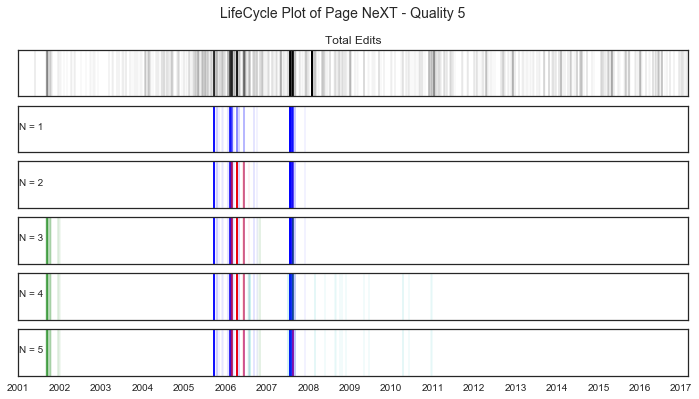

In [177]:
plot_page_burst("../../data/NeXT_5.txt")

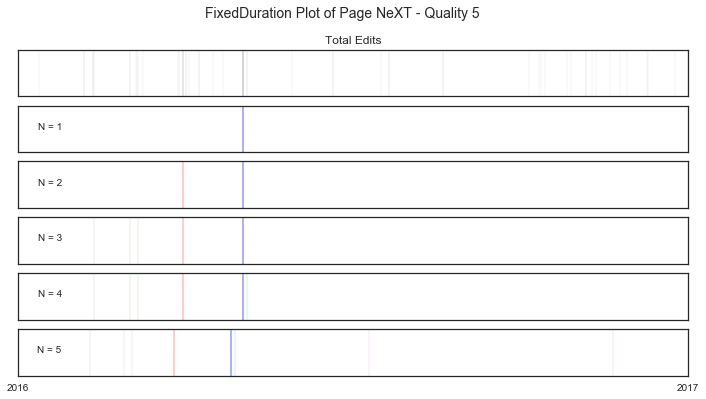

In [164]:
plot_page_burst("../../data/NeXT_5.txt", kind='FixedDuration')

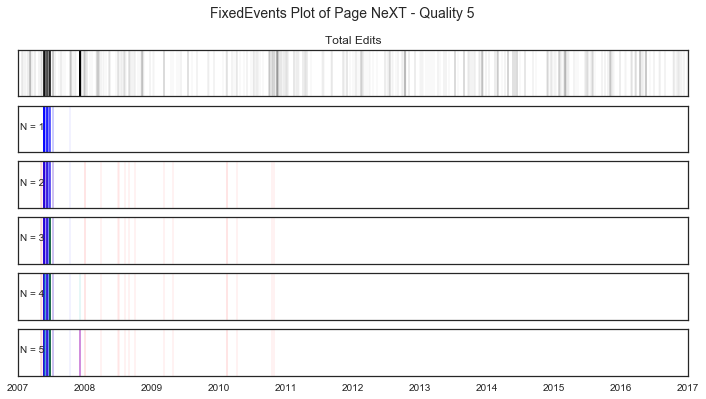

In [178]:
plot_page_burst("../../data/NeXT_5.txt", kind='FixedEvents')

In [193]:
import random

random.seed(2333)
test_page =random.sample(articles,10)
test_page

['../../data/IJustine_4.txt',
 '../../data/Angry_Birds_Rio_1.txt',
 '../../data/Labyrinth:_The_Computer_Game_4.txt',
 '../../data/Civilization_(video_game)_2.txt',
 '../../data/Macintosh_Classic_5.txt',
 '../../data/Galeon_3.txt',
 '../../data/Errol_Morris_3.txt',
 '../../data/Beagle_Bros_1.txt',
 '../../data/Dungeon_Siege_5.txt',
 '../../data/Rage_(video_game)_2.txt']

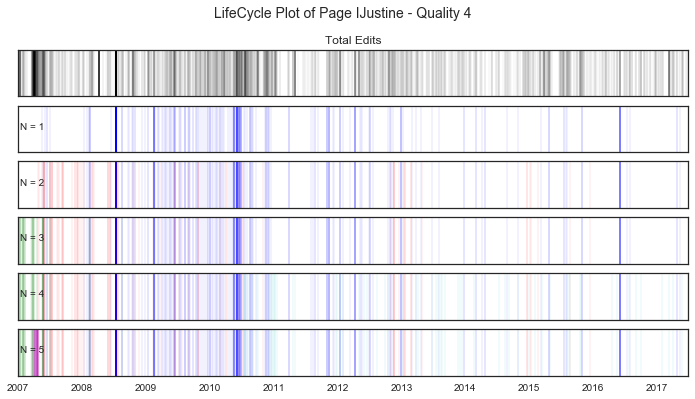

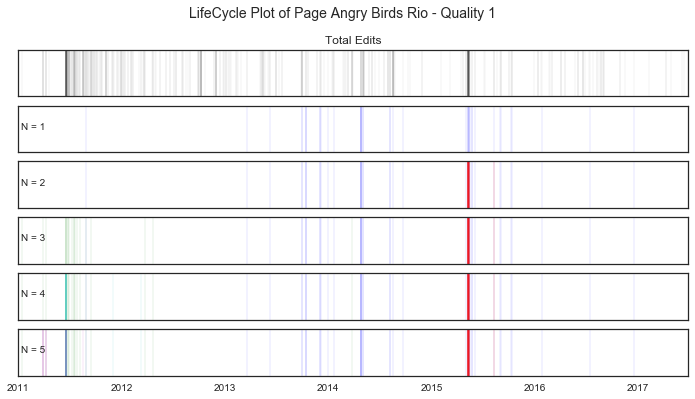

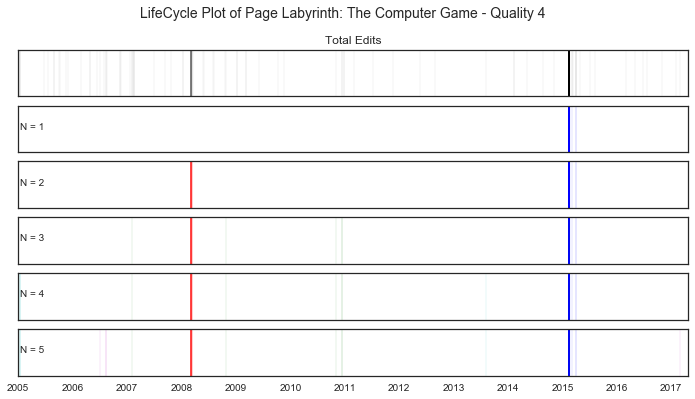

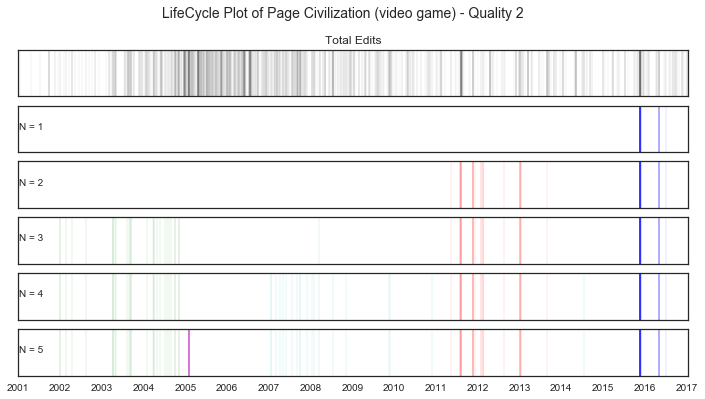

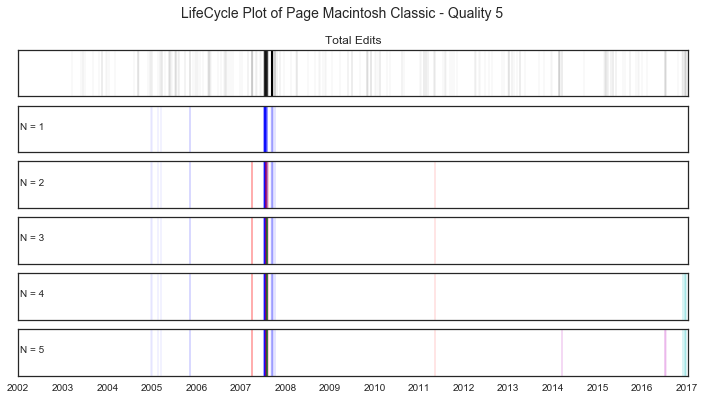

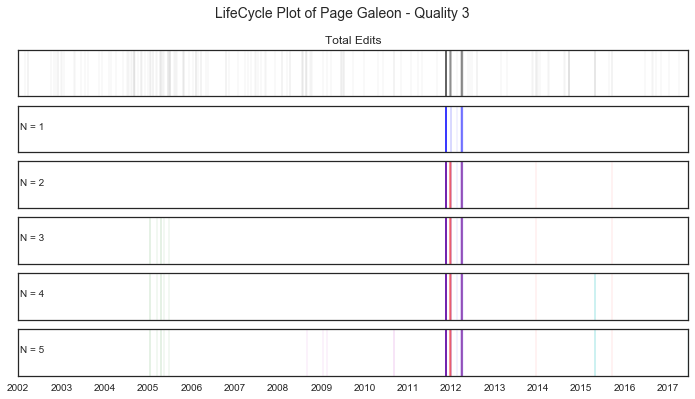

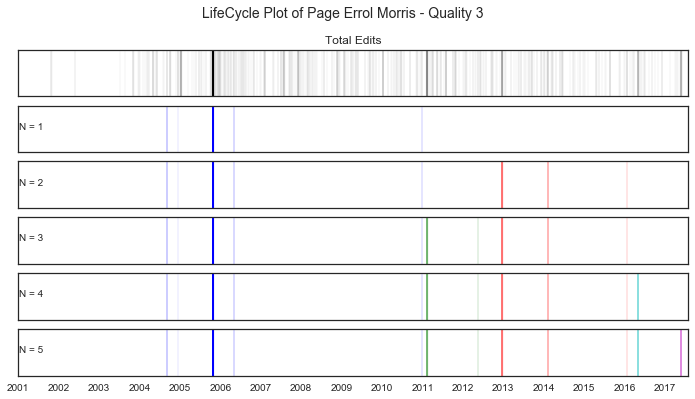

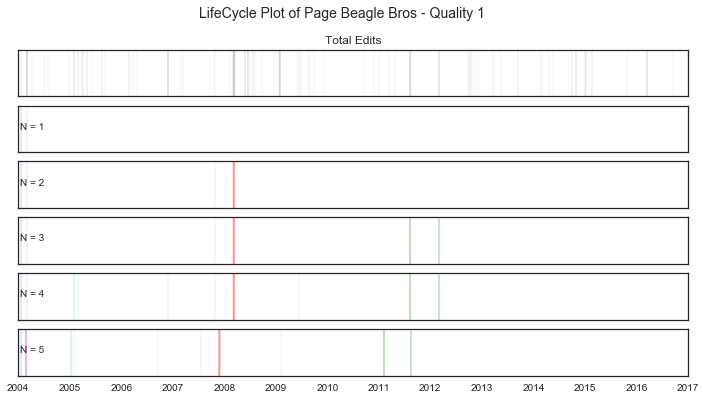

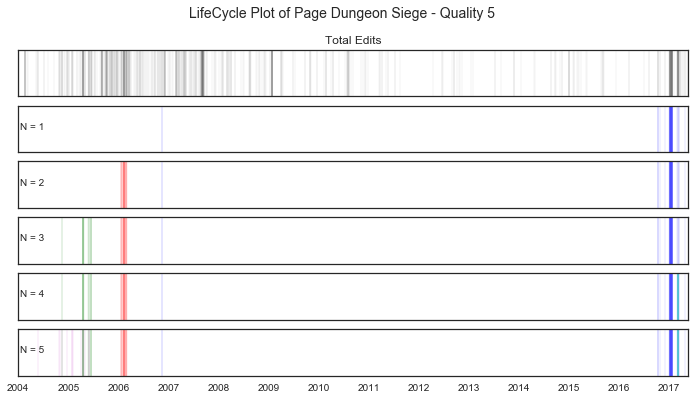

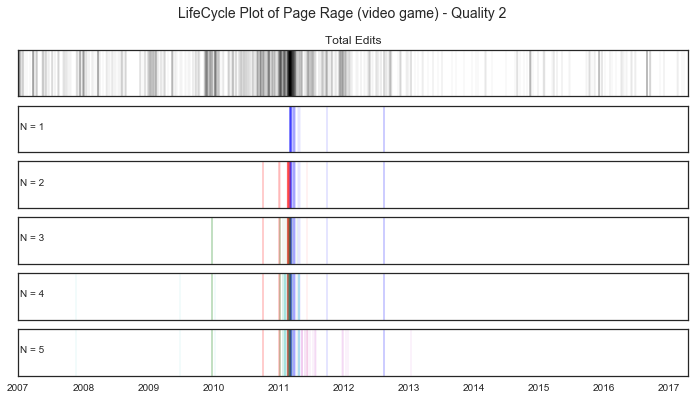

In [197]:
for f in test_page:
    folder = "/Users/Nico/GoogleDrive/research/wikipedia_shared/presentation/graph/LifeCycle/"
    plot_page_burst(f, folder, N=6, kind = 'LifeCycle')

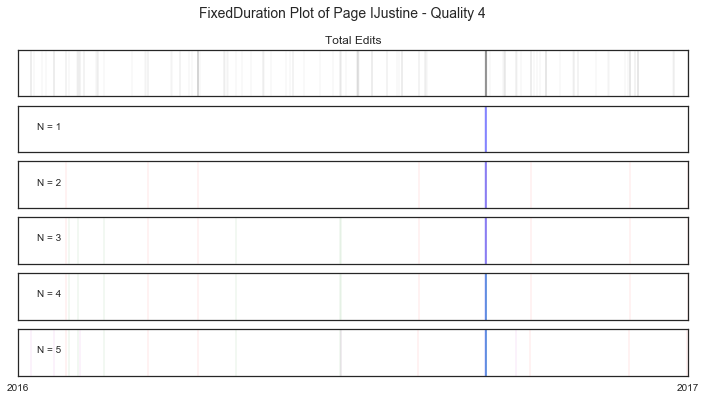

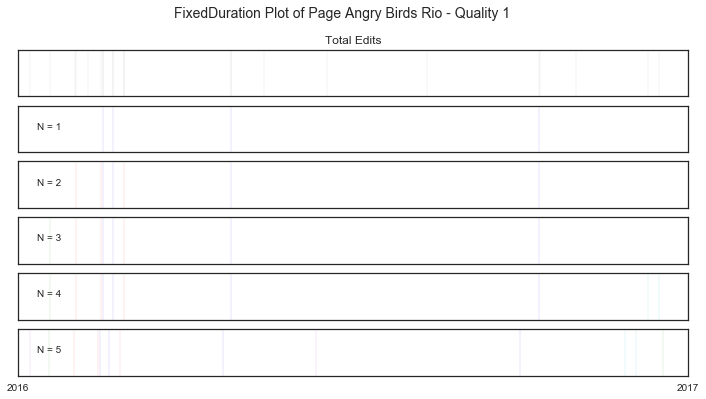

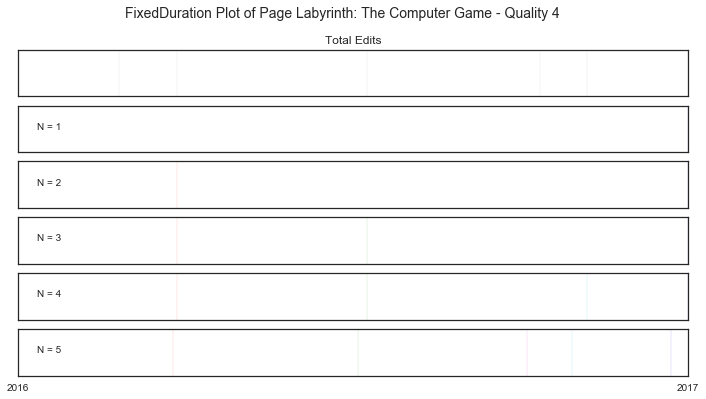

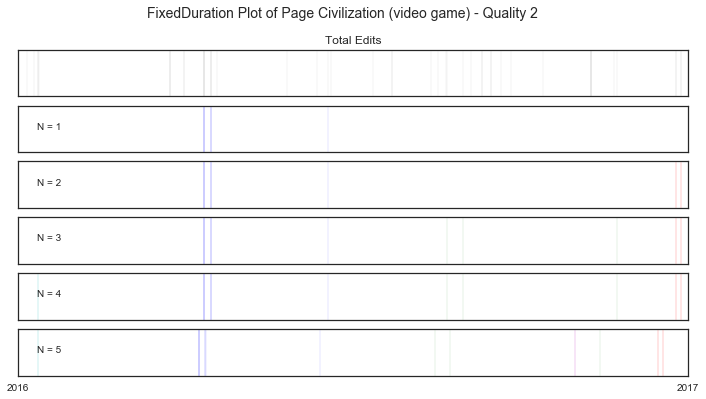

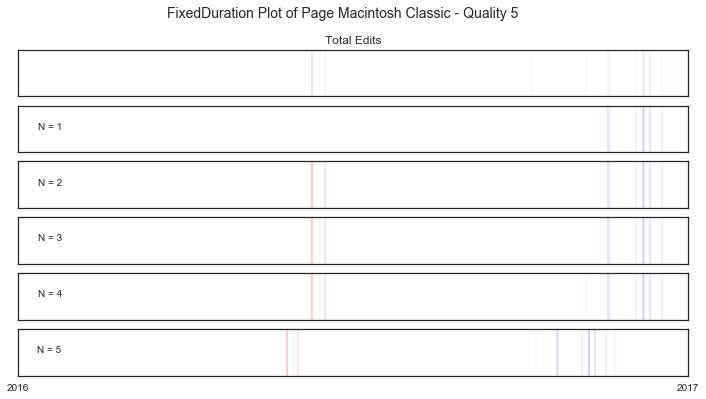

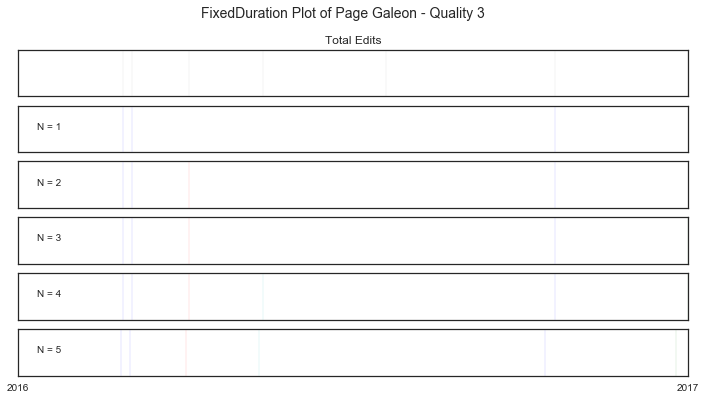

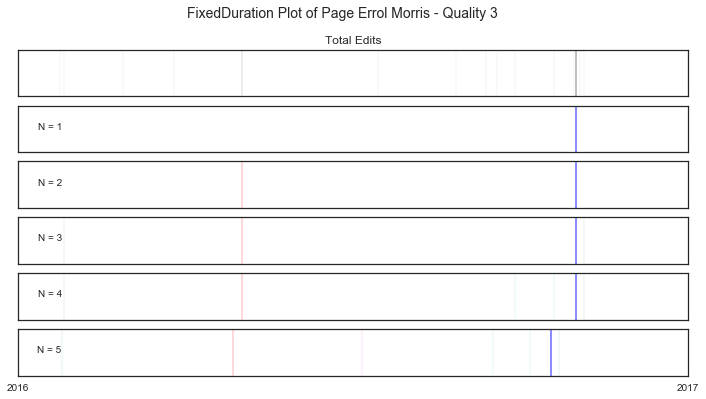

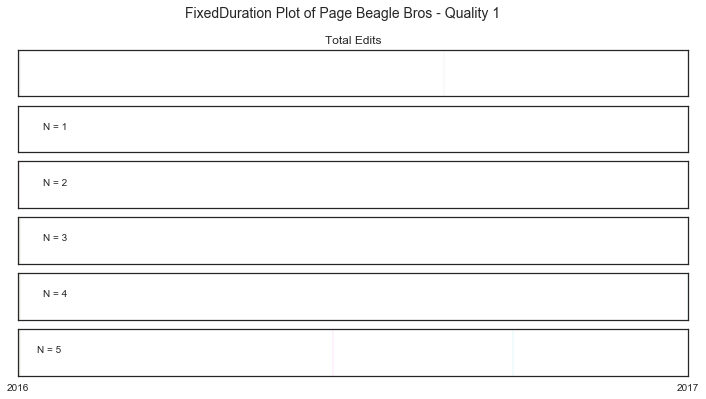

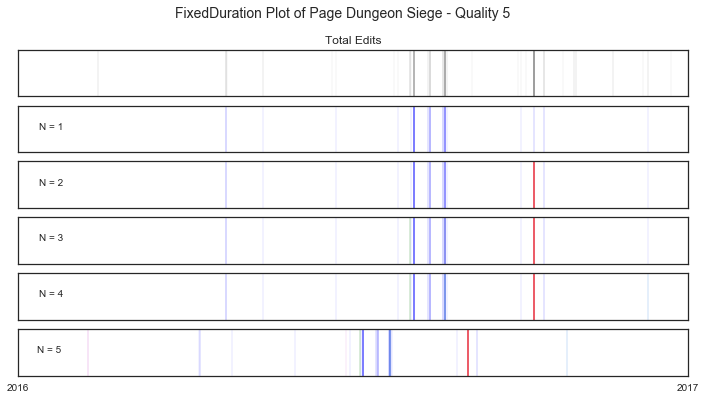

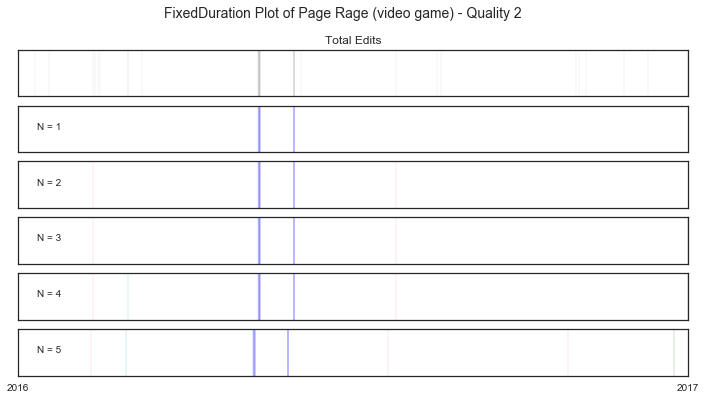

In [198]:
for f in test_page:
    folder = "/Users/Nico/GoogleDrive/research/wikipedia_shared/presentation/graph/FixedDuration/"
    plot_page_burst(f, folder, N=6, kind = 'FixedDuration')

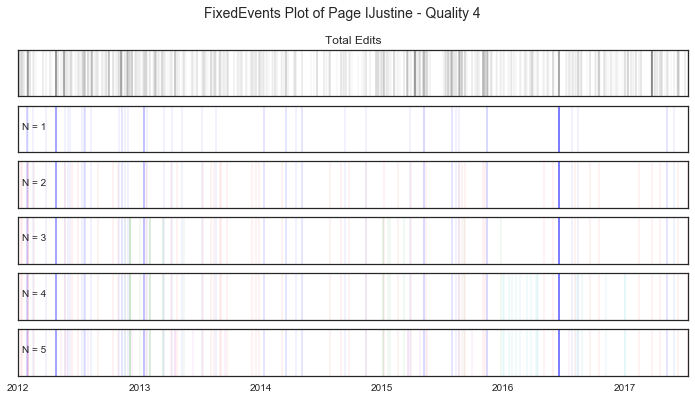

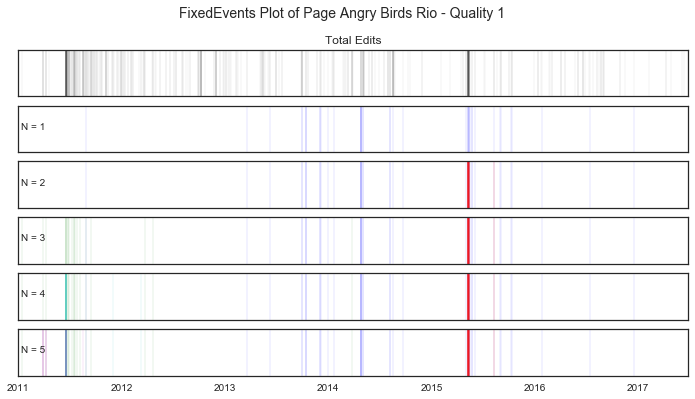

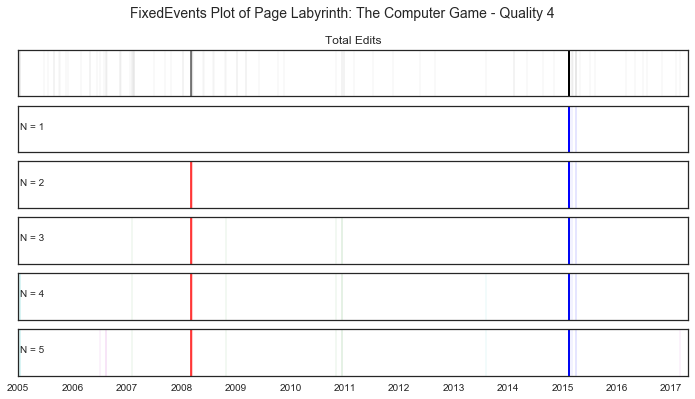

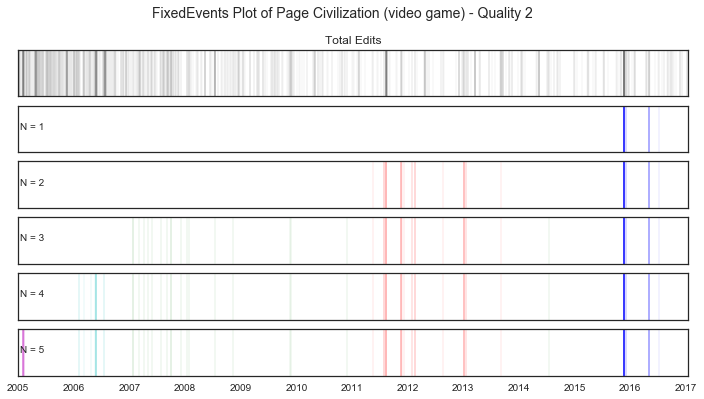

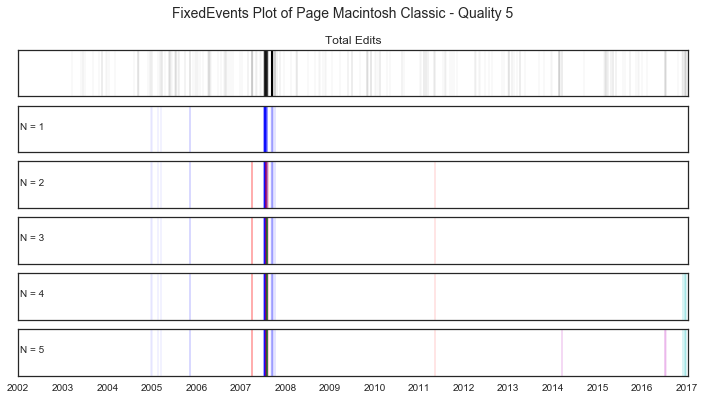

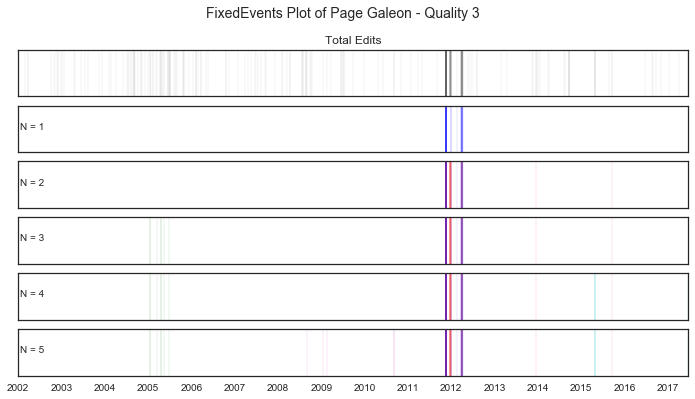

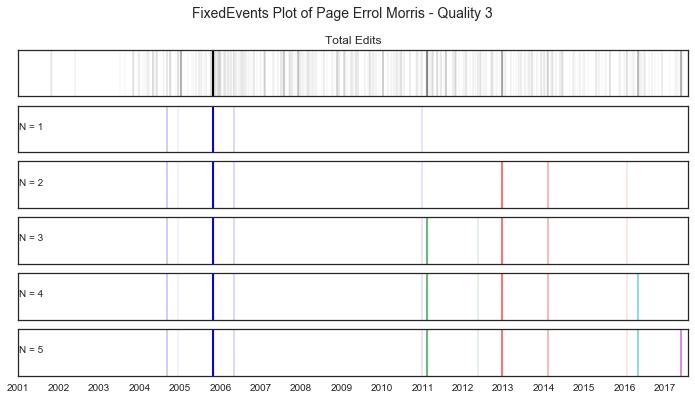

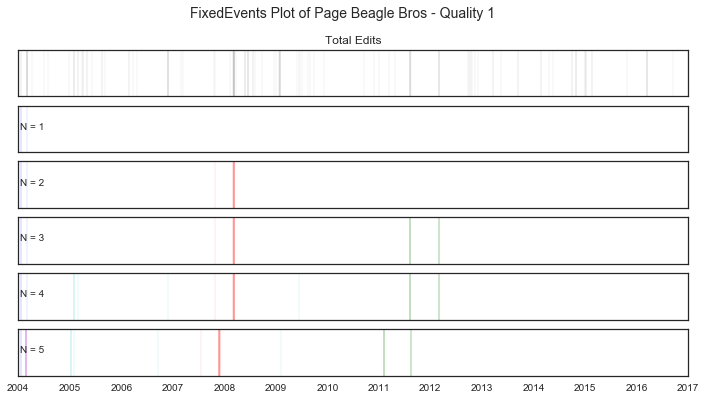

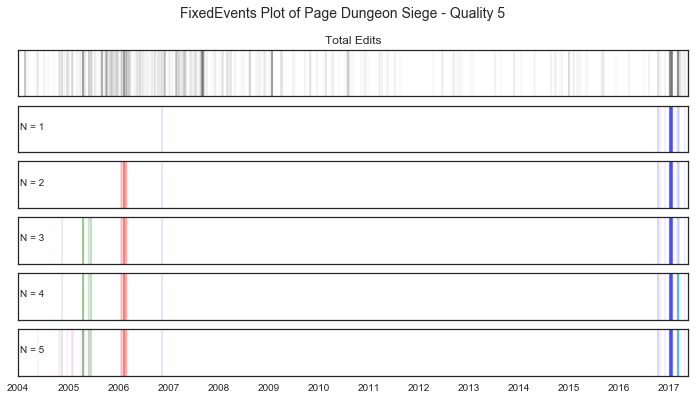

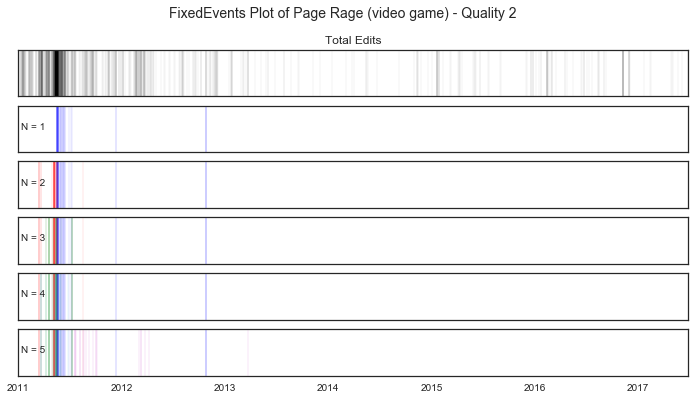

In [199]:
for f in test_page:
    folder = "/Users/Nico/GoogleDrive/research/wikipedia_shared/presentation/graph/FixedEvents/"
    plot_page_burst(f, folder, N=6, kind = 'FixedEvents')